Bag of ngrams aslında normal BOW un farklı versiyonlarıdır.BOW n gramda n=1 ikenki halidir.her kelime ayrı değerlendirilir.
Ama farklı n gramlarda örnegın 2 olursa n => o zaman kelimeler 2li 2li yapılır.Window boyutu 2 olur ve her seferinde 1 kaydırılır.Stride 1 oldugunda Conv layer gibi.Bu aslında daha meaningful olabilirken vektör uzunlugunu arttırmaktadır.Bu sorun beraberınde AOV(Address out of memmory) olabilmektedir.

Aynı zamanda hem n=1 hemde n=2(bi-gram) kullanmak yaygın bir yaklaşımdır.Bu yaklaşım genelde fazla memmory kullansada kullnılailmektedir.
Ayrıca n=3 de yani tri-gramda kullanılabilmektedir.Bu ne kadar vektörü büyütsede anlamı arttırmaktadır.
Window artması beraberınde sprasity increases durumu olmaktadır(Sürekli artmak anlamında.).

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

text = "Where is my book?"

v = CountVectorizer(ngram_range=(1, 2))
v.fit([text])

v.vocabulary_

{'where': 5,
 'is': 1,
 'my': 3,
 'book': 0,
 'where is': 6,
 'is my': 2,
 'my book': 4}

In [5]:
import spacy 

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [7]:
text = "Thor is ate pizza"
preprocess(text)

'thor eat pizza'

In [8]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [9]:
corpus_processed = [preprocess(x) for x in corpus]

In [10]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [11]:
v = CountVectorizer(ngram_range=(1, 2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [14]:
v.transform(["enes eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

Transfrom sırasında vektörde olmayan kelimeler yok sayılır.Onları vektöre dahil etmez

In [19]:
import pandas as pd

df = pd.read_json(r'../news_dataset.json')

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [20]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [21]:
min_samples = 1381

df_business = df[df['category'] == 'BUSINESS'].sample(min_samples, random_state=42)
df_business

,text,category
594,How to Develop the Next Generation of Innovato...,BUSINESS
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS
...,...,...
7260,Secret Fine Print Lets Wall Street Enrich Itse...,BUSINESS
12149,Jeff Bezos Announces $33 Million Scholarship F...,BUSINESS
6465,Golfing Your Way to Success: The Power of Conn...,BUSINESS
10330,AOL in Alliance With NBCUniversal for Content ...,BUSINESS


In [22]:
df_science = df[df['category'] == 'SCIENCE'].sample(min_samples, random_state=42)
df_sports = df[df['category'] == 'SPORTS'].sample(min_samples, random_state=42)
df_crime = df[df['category'] == 'CRIME'].sample(min_samples, random_state=42)


In [23]:
df_balanced = pd.concat([df_business, df_science, df_crime, df_sports], axis=0)
df_balanced

,text,category
594,How to Develop the Next Generation of Innovato...,BUSINESS
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS
...,...,...
424,'Floyd Did Not Fight Like The Man I Expected',SPORTS
3533,"18 Years Ago, This Pesky Kid Broke Baltimore O...",SPORTS
9813,Miami Heat's Dwyane Wade Pays Surprise Visit T...,SPORTS
3594,Even The Lions Outside The Art Institute Of Ch...,SPORTS


In [24]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [26]:
df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [29]:
df_balanced.category_num.value_counts()

category_num
0    1381
3    1381
2    1381
1    1381
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced.text, df_balanced.category_num, test_size=0.2, stratify=df_balanced.category_num, random_state=42)

print(X_train.shape)
X_train.head()

(4419,)


6414     Arby's Employee Keeps Job After Refusing To Se...
1318     Colorful NASA Image Shows Off Pluto’s Psychede...
4170     Women in Business Q&A: Sophie Delafontaine, Ar...
11310    5 Formalized Referral Systems to Grow Your Sal...
4188     Hawaii's Kilauea Volcano Sees A Mesmerizing Ri...
Name: text, dtype: object

In [32]:
y_train.value_counts()

category_num
0    1105
3    1105
1    1105
2    1104
Name: count, dtype: int64

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi_NB', MultinomialNB())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('Multi_NB', MultinomialNB())])

In [34]:
pred = pipe.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.92      0.85      0.88       276
           2       0.91      0.89      0.90       277
           3       0.89      0.82      0.85       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [ ]:
pipe = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
    ('Multi_NB', MultinomialNB())
])

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       276
           1       0.92      0.83      0.87       276
           2       0.91      0.88      0.89       277
           3       0.93      0.79      0.85       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [41]:
pipe = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 3))),
    ('Multi_NB', MultinomialNB())
])

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       276
           1       0.92      0.80      0.85       276
           2       0.91      0.88      0.89       277
           3       0.92      0.77      0.84       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [45]:
df_balanced['precessed_text'] = df_balanced['text'].apply(lambda x : preprocess(x))

In [46]:
df_balanced.head()

,text,category,category_num,precessed_text
594,How to Develop the Next Generation of Innovato...,BUSINESS,0,develop Generation Innovators stop treat way g...
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0,Madoff Victims Payout near $ 7.2 billion Trust...
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0,Bay Area Floats Sanctuary Transit Policy prote...
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0,Microsoft agree acquire linkedin $ 26.2 billio...
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0,inside Legal Multibillion Dollar Weed Market


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.precessed_text, 
    df_balanced.category_num, 
    test_size=0.2, 
    random_state=2022,
    stratify=df_balanced.category_num
)

In [50]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [51]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       276
           1       0.93      0.82      0.87       277
           2       0.84      0.92      0.88       276
           3       0.90      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[248,   8,  10,  10],
       [ 16, 228,  21,  12],
       [ 16,   4, 254,   2],
       [ 30,   5,  16, 225]])

Text(95.72222222222221, 0.5, 'Truth')

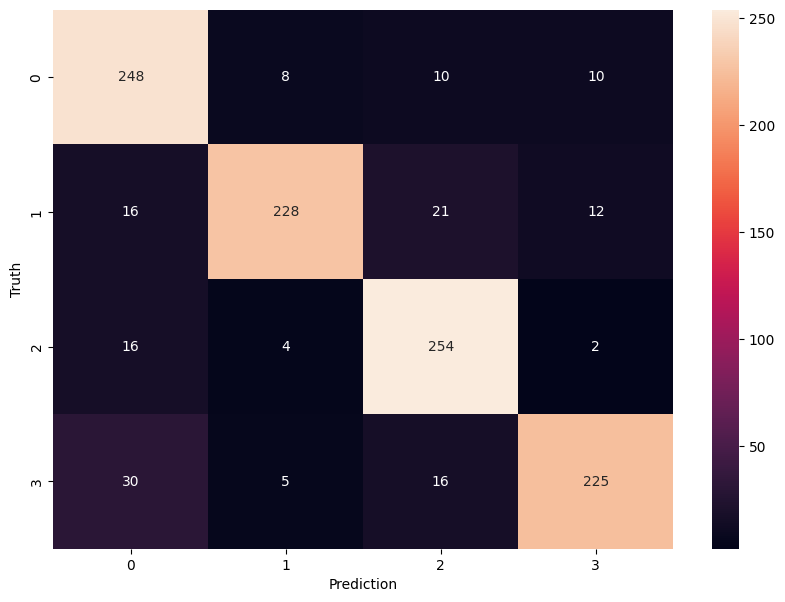

In [57]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')